<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0713_45%EC%9D%BC%EC%B0%A8_AI(%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B3%B5%EC%8A%B5%2Cmglearn%5BTN%2CFP%2CFN%2CTP%2C%EC%A0%95%EB%B0%80%EB%8F%84%5D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df


# 러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


# 라벨 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def adj_scale(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_array = scaler.transform(df)
    df_scaled = pd.DataFrame(data=scaled_array, columns=df.columns)
    return df_scaled

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    df = adj_scale(df)
    return df


In [31]:
def fit_transform_predict(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    return (accuracy_score(y_test.pred))

In [ ]:
!cp ./drive/MyDrive/titanic_train.csv ./

In [21]:
titanic_sample = pd.read_csv('titanic_train.csv')

In [22]:
y_titanic_df = titanic_sample['Survived']
X_titanic_df = titanic_sample.drop('Survived', axis=1)

In [23]:
X_titanic_df = transform_features(X_titanic_df)

In [24]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size =0.2, random_state=11)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
dt_clf = DecisionTreeClassifier()

In [33]:
scores = cross_val_score(dt_clf, X_train, y_train,cv=5 )

In [34]:
scores

array([0.74825175, 0.76923077, 0.77464789, 0.78873239, 0.76760563])

In [35]:
np.mean(scores)

0.769693686595095

In [36]:
parameters = {'max_depth' : [1,2,3,5,10], 'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

In [39]:
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5)
grid_dtree.fit(X_train, y_train)
print(grid_dtree.best_score_)
best_esti = grid_dtree.best_estimator_
pred = best_esti.predict(X_test)
accuracy_score(y_test,pred)

0.8005811090318133


0.8715083798882681

#평가

정확도

$$
{정확도(Acuuracy)} = {예측이 맞은 자료의 수 \over 전체 예측 자료수}
$$

이진(0,1) 분류의 경우 정확도가 잘못된 정보를 줄 수 있다.

정밀도, 재현율, F1-score, ROC-AUC

In [41]:
#BeseEstimator 를 상속 받은 클래스를 정의할 경우, 사용자 정의 Estimator 를 만들 수 있다.
#남자가 입력되면 죽고 여자는 무조건 산다는 말이 안되는 Estimator다....흐음...
from sklearn.base import BaseEstimator
class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] ==1 :
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

#처리해보기

In [42]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df


# 러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


# 라벨 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def adj_scale(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_array = scaler.transform(df)
    df_scaled = pd.DataFrame(data=scaled_array, columns=df.columns)
    return df_scaled

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    df = adj_scale(df)
    return df


In [43]:
titanic_sample = pd.read_csv('titanic_train.csv')

In [44]:
y_titanic_df = titanic_sample['Survived']
X_titanic_df = titanic_sample.drop('Survived', axis=1)

In [45]:
X_titanic_df = transform_features(X_titanic_df)

In [46]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size =0.2, random_state=11)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [48]:
from sklearn.base import BaseEstimator

MyDummyClassifier의 인스턴스 생성, fit 실행, predict, accuracy_score

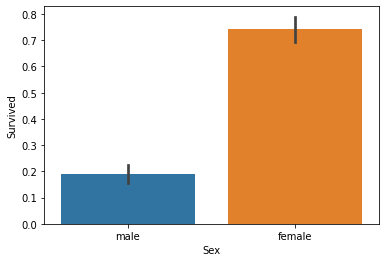

In [54]:
BaseEstimator=MyDummyClassifier()
#print(BaseEstimator)
BaseEstimator.fit(X_train, y_train)
BaseEstimator_pred=BaseEstimator.predict(X_test)
#print(BaseEstimator_pred)
print('BaseEstimator 정확도 :{0:.4f}'.format(accuracy_score(y_test, BaseEstimator_pred)))

BaseEstimator 정확도 :0.8324


In [49]:
#선생님
mdcf = MyDummyClassifier()
mdcf.fit(X_train, y_train)
pred = mdcf.predict(X_test)
accuracy_score(y_test, pred)

0.8324022346368715

In [55]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=ccdd0e53b2cb51909031dccbc6a51133892563b3389192f40c92e289ae4d363e
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


#mglearn


In [56]:
import mglearn

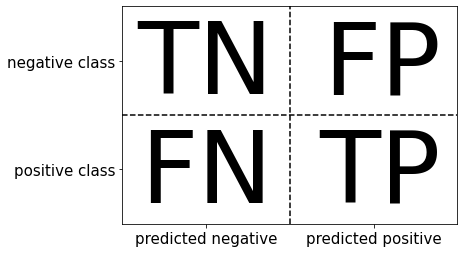

In [57]:
mglearn.plots.plot_binary_confusion_matrix() #confusion matrix 보여주기

모두 예측값 기준 N=0, P=1

TN: 예측값 = N, 실제 = N

FP: 예측값 = P, 실제 = N

FN: 예측값 = N, 실제 = P

TP: 예측값 = P, 실제 = P

$$
accuracy = {TN + TP \over TN + TP + FN + FP }
$$

#정밀도

$$
precision = {TP \over TP + FP}
$$

얼마나 정밀하게 맞추냐 = 얼마나 잘 맞추냐


재현율 : recall

$$
recall = {TP \over TP+FN}
$$

암을 양성 판단하는 분류기 개발 (음성을 양성으로 판정 - > 검사비용 지출, 양성을 음성으로 판정-> 갑작스러운 죽음)

스팸메일 분류기 개발 (음성을 양성으로 판정 -> 스펨이 아닌데 스펨으로 판정 -> 메일 누락 -> 취업 탈락, 양성을 음성으로 판정 -> 귀찮음)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [59]:
def get_clf_eval(y_test, pred):
    confusion= confusion_matrix(y_test, pred)
    accuracy= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred)
    recall= recall_score(y_test, pred)
    print(confusion, accuracy, precision, recall)

In [60]:
get_clf_eval(y_test, pred)

[[103  15]
 [ 15  46]] 0.8324022346368715 0.7540983606557377 0.7540983606557377
